In [44]:
# Dependencies
import json
import requests
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import operator
from pprint import pprint
import random
import scipy
import scipy.stats
from scipy.stats import linregress, sem, ttest_ind
#from spread import variance, standard_deviation, zipped_z_scores
#from stats import mean, median, mode, multi_mode

In [2]:
# Original Dataframe used for Revenue, Budget information
path = "tmdb-5000-movie-dataset/moviesapi_clean.csv"
df = pd.read_csv(path)
df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,7.1,961000000,300000000
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",8.4,1084939099,250000000
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,6.6,284139100,260000000


In [3]:
df["Rated"].unique()

array(['PG-13', 'PG', 'G', 'Not Rated', 'R', 'TV-14', 'Unrated', 'Passed',
       'NC-17', nan, 'Approved', 'APPROVED', 'GP', 'M', 'NOT RATED',
       'UNRATED', 'TV-G', 'TV-PG', 'TV-MA', 'PASSED', 'M/PG', 'X'],
      dtype=object)

In [4]:
#Remove duplicate rated values

df.dropna(how='any')
df=df.replace({"Not Rated": "Unrated", "nan": "Unrated", "APPROVED": "Approved", "NOT RATED": "Unrated", "UNRATED": "Unrated", "PASSED": "Passed"})
df
rated_unique_values=df["Rated"].unique()

In [5]:
# Movie release dates are between 1916 and 2017

df['Year'].sort_values(ascending= False).head(5)

4297    2019
4228    2018
4559    2018
4564    2018
4391    2018
Name: Year, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4582 entries, 0 to 4581
Data columns (total 12 columns):
Title          4582 non-null object
Year           4582 non-null int64
Rated          4497 non-null object
Runtime        4582 non-null object
Genre          4582 non-null object
Director       4576 non-null object
Writer         4538 non-null object
Language       4575 non-null object
Country        4582 non-null object
IMDB Rating    4582 non-null float64
Revenue        4582 non-null int64
Budget         4582 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 429.6+ KB


In [7]:
#List of 5 random directors and the number of movies they directed

random_directors=[]
movies_directed=[]
for i in range(0,5):
    random_directors.append(random.choice(df["Director"]))
print(random_directors)
for director in random_directors:
    movies_directed.append(len(df[df['Director'] == director]))
print(movies_directed)

['Michael Caton-Jones', 'Brian De Palma', 'Amanda Gusack', 'Steve Oedekerk', 'Mike Newell']
[3, 12, 1, 4, 7]


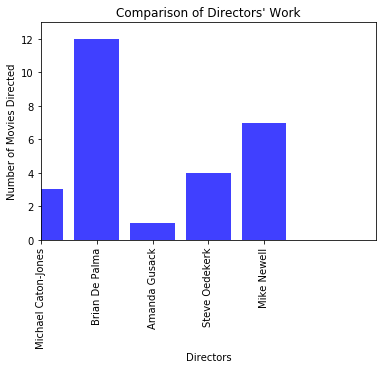

<Figure size 432x288 with 0 Axes>

In [8]:
#Directors' movies bar chart using list of random directors

x_axis = np.arange(len(movies_directed))
plt.bar(x_axis, movies_directed, color='b', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, random_directors, rotation=90)
plt.xlim(0, len(x_axis)+1)
plt.ylim(0, max(movies_directed)+1)
plt.title("Comparison of Directors' Work")
plt.xlabel("Directors")
plt.ylabel("Number of Movies Directed")
plt.savefig("Graphs/DirectorBarChart.png")
plt.show()
plt.tight_layout()

In [9]:
#do .loc by genre and then create genre_groups=merged_df[["Genre", "Rated"]]. do rated_groups=genre_groups.groupby("Rated")

genre_groups=df.groupby(['Genre','Rated'])
counted_up=genre_groups.count()
counted_up.head()

Title  Year  Runtime  Director  Writer  Language  \
Genre             Rated                                                     
Action            PG-13      1     1        1         1       1         1   
                  R          4     4        4         4       4         4   
Action, Adventure PG         2     2        2         2       2         2   
                  PG-13     10    10       10        10      10        10   
                  R          3     3        3         3       3         3   

                         Country  IMDB Rating  Revenue  Budget  
Genre             Rated                                         
Action            PG-13        1            1        1       1  
                  R            4            4        4       4  
Action, Adventure PG           2            2        2       2  
                  PG-13       10           10       10      10  
                  R            3            3        3       3

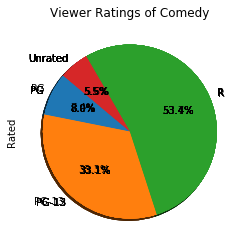

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

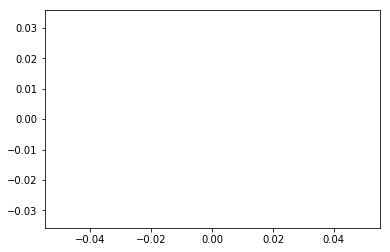

In [23]:
# Pie chart showing viewer rated movies of a specific genre

genre_id="Comedy"
one_genre=counted_up.loc[genre_id]
rated_list=one_genre.keys()
genre_pie=one_genre.plot(kind="pie",y=rated_list,title=("Viewer Ratings of "+genre_id), autopct="%1.1f%%", shadow=True, startangle=140, legend=None)
genre_pie.set_ylabel("Rated")
plt.show()
plt.tight_layout()
plt.axis("equal")

#plt.legend(loc="upper right")

In [37]:
# Mean, median mode of revenue and budgets

budget_data= df["Budget"]
revenue_data=df["Revenue"]

print(f"Mean Budget: {mean(budget_data)}")
print(f"Median Budget: {median(budget_data)}")
print(f"Mode Budget: {median(budget_data)}")
print(f"Mean Revenue: {mean(revenue_data)}")
print(f"Median Revenue: {median(revenue_data)}")
print(f"Mode Revenue: {median(revenue_data)}")

NameError: name 'mean' is not defined

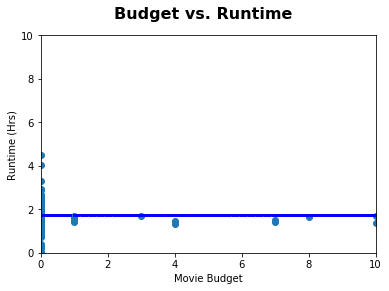

In [43]:
# Budget vs Runtime data

list_runtime=[]
runtime_hrs=[]
for list_item in df['Runtime']:
    list_item=list_item.strip(' min')
    list_runtime.append(int(list_item))
    
for list_item in list_runtime:
    runtime_hrs.append(round(list_item/60,2))
    
x_axis = df["Budget"]
y_axis = runtime_hrs
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Budget vs. Runtime", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Movie Budget")
ax.set_ylabel("Runtime (Hrs)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

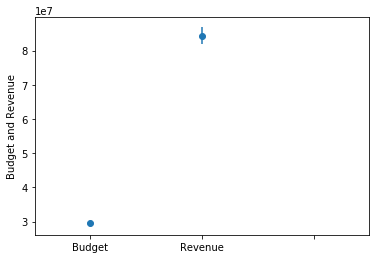

In [45]:
#Budget and Revenue t-test

budget_data = df["Budget"]
budget_means = np.mean(budget_data)
budget_sem = sem(budget_data)

revenue_data = df["Revenue"]
revenue_means = np.mean(revenue_data)
revenue_sem = sem(revenue_data)

means = [budget_means, revenue_means]
sems = [budget_sem, revenue_sem]
labels = ["Budget", "Revenue"]

fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(means)), means, yerr=sems, fmt="o")

ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1, 2])

ax.set_ylabel("Budget and Revenue")

plt.show()


In [46]:
(t_stat, p) = ttest_ind(budget_data, revenue_data, equal_var=False)

if p < 0.05:
    print("The difference between budget and revenue is significant.")
else:
    print("The difference between budget and revenue is due to chance.")

The difference between budget and revenue is significant.
